In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Final_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG
/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/01b32f27-2b9b-4961-805b-8066bf4d90f1___PSU_CG 2417.JPG
/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098.JPG
/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/05910684-8466-4472-b520-b6f90bfc0d01___PSU_CG 2076.JPG
/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/00c07a77-15e6-4815-92d4-8d1e1afb7f3c___PSU_CG 2052.JPG
/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/03b6acc7-41a6-4670-b47c-bef6d4baea18___PSU_CG 2363.JPG
/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/046a2559-23b4-4018-a3db-337347ceb391___PSU_CG 2321.JPG
/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_mosaic_virus/006e354b-c054-4b72-a83c-e3feb038942e___PSU_CG 2330.JPG
/content/drive/MyDrive/Final_Dat

In [ ]:
train_dir="/content/drive/MyDrive/Final_Dataset"

In [ ]:
Classes = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']

In [ ]:
import cv2
import numpy as np
train_data = []
img_size=224
def get_training_data():
    for label in  Classes:
        path=os.path.join(train_dir, label)
        class_num = Classes.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                train_data.append([resized_arr, class_num])
            except Exception as e:
                pass

In [ ]:
get_training_data()

In [ ]:
print(len(train_data))

1500


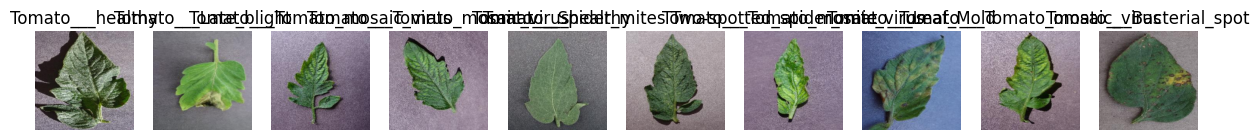

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

# Set the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/Final_Dataset'

# List the classes (subdirectories) in your dataset directory
classes = os.listdir(dataset_dir)

# Create a figure to display the 10 random images
fig, axes = plt.subplots(1, 10, figsize=(15, 5))

# Iterate over 10 random classes
for i in range(10):
    class_name = random.choice(classes)  # Randomly select a class
    class_dir = os.path.join(dataset_dir, class_name)

    # List all image files in the class directory
    images = os.listdir(class_dir)

    # Check if there are any images in the directory
    if not images:
        continue  # Skip to the next iteration if no images are found

    # Randomly select an image from the class
    image_name = random.choice(images)
    image_path = os.path.join(class_dir, image_name)

    # Read and display the selected image
    image = cv2.imread(image_path)
    image=cv2.resize(image,(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i].imshow(image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.show()


In [ ]:
for label in Classes:
    print(Classes.index(label))

0
1
2
3
4
5
6
7
8
9


In [ ]:
x=[]
y=[]
for i,j in train_data:
  x.append(i)
  y.append(j)
x=np.array(x).reshape(-1,img_size, img_size,3)

In [ ]:
x.shape

(1500, 224, 224, 3)

In [ ]:
x=x/255.0

In [ ]:
y=np.array(y)

In [ ]:
print(y.shape)
print(y)

(1500,)
[0 0 0 ... 9 9 9]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=True,test_size=0.2)

In [ ]:
print(x_train.shape)

(1200, 224, 224, 3)


In [ ]:
print(y_test)

[0 0 8 2 8 5 6 8 7 2 4 1 8 0 4 7 1 6 8 2 9 8 9 5 0 9 8 6 8 5 7 1 8 7 1 6 7
 0 0 6 6 3 4 3 5 4 8 5 9 1 7 8 7 3 6 7 3 9 2 3 6 9 3 3 8 2 1 2 9 3 6 3 6 3
 6 9 7 0 2 7 2 6 3 6 3 7 7 1 3 2 5 4 0 5 0 5 4 5 2 7 9 9 7 5 0 3 4 0 3 9 9
 5 6 3 0 3 0 2 7 4 4 8 5 7 2 9 4 5 0 7 2 1 1 5 0 7 2 2 3 8 8 8 8 0 3 4 9 0
 7 1 4 4 1 3 4 9 4 3 6 6 6 0 2 4 5 0 4 5 5 5 0 9 6 5 9 3 5 4 1 1 1 8 4 0 3
 3 1 8 8 4 5 1 4 7 8 2 6 3 1 5 8 1 7 8 2 3 8 0 3 5 4 7 9 6 1 4 6 0 3 2 6 9
 4 7 7 4 4 0 0 5 8 4 2 4 4 7 1 1 1 8 1 1 3 7 1 1 1 6 3 3 0 2 1 3 5 6 9 5 3
 6 7 4 0 4 2 2 5 5 2 9 8 0 8 2 6 6 1 5 8 5 0 6 8 0 4 4 9 5 8 4 9 7 6 2 3 7
 8 7 0 2]


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=10)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test= to_categorical(y_test, num_classes=10)

In [ ]:
print(x_train.shape,y_test.shape)

(1200, 224, 224, 3) (300, 10)


**MobileNet**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
import os
from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import  ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)


x = Dense(units=10 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)
#model = Model(inputs=base_model.input, outputs=output_layer)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
mnet= model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
38/38 [==============================] - 46s 1s/step - loss: 7.5049 - accuracy: 0.5408 - val_loss: 1.7519 - val_accuracy: 0.8000
Epoch 2/15
38/38 [==============================] - 44s 1s/step - loss: 0.3560 - accuracy: 0.9442 - val_loss: 1.6899 - val_accuracy: 0.8033
Epoch 3/15
38/38 [==============================] - 43s 1s/step - loss: 0.0748 - accuracy: 0.9825 - val_loss: 1.3875 - val_accuracy: 0.8267
Epoch 4/15
38/38 [==============================] - 44s 1s/step - loss: 0.0577 - accuracy: 0.9883 - val_loss: 1.4473 - val_accuracy: 0.8000
Epoch 5/15
38/38 [==============================] - 44s 1s/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 1.2968 - val_accuracy: 0.8300
Epoch 6/15
38/38 [==============================] - 41s 1s/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 1.4130 - val_accuracy: 0.8300
Epoch 7/15
38/38 [==============================] - 41s 1s/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.1797 - val_accuracy: 0.8433
Epoch 8/15
38/38 [==

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

10/10 [==============================] - 8s 816ms/step - loss: 1.4167 - accuracy: 0.8400
Test accuracy: 84.00%


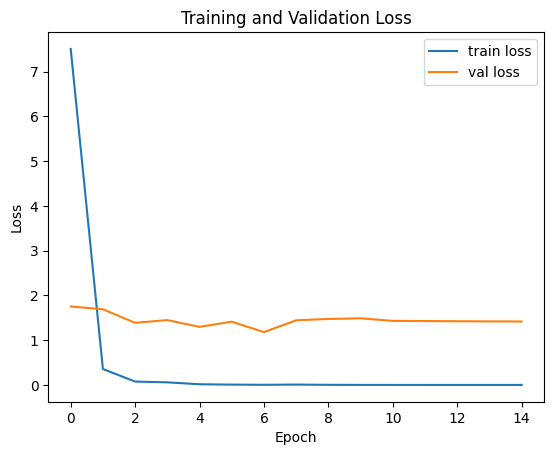

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(mnet.history['loss'], label='train loss')
plt.plot(mnet.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

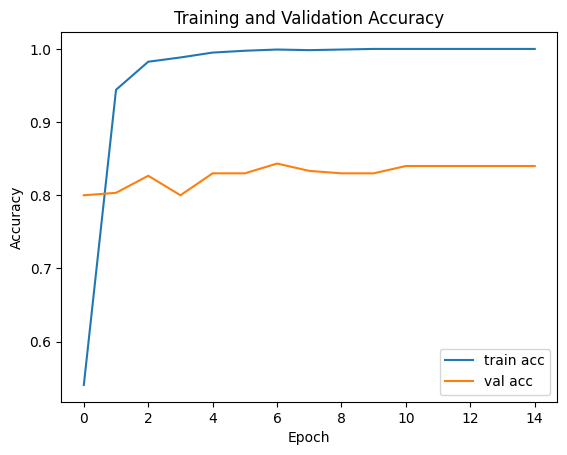

In [ ]:
# Plot the accuracy
plt.plot(mnet.history['accuracy'], label='train acc')
plt.plot(mnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

10/10 [==============================] - 8s 823ms/step
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[119   0   0   0   0   0   0   0   0   0]
 [  0 121   0   0   0   0   0   0   0   0]
 [  0   0 123   0   0   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0   0   0]
 [  0   0   0   0 116   0   0   0   0   0]
 [  0   0   0   0   0 119   0   0   0   0]
 [  0   0   0   0   0   0 121   0   0   0]
 [  0   0   0   0   0   0   0 120   0   0]
 [  0   0   0   0   0   0   0   0 118   0]
 [  0   0   0   0   0   0   0   0   0 127]]

Testing Metrics:
Accuracy: 0.8400
Precision: 0.8486
Recall: 0.8400
F1-Score: 0.8397
Confusion Matrix:
[[29  0  0  0  1  0  1  0  0  0]
 [ 0 22  0  1  2  1  2  0  0  1]
 [ 0  2 20  3  0  0  0  0  0  2]
 [ 0  2  0 29  0  2  0  0  0  1]
 [ 1  4  1  4 22  0  1  0  1  0]
 [ 0  0  0  0  0 27  3  0  0  1]
 [ 1  1  0  1  0  2 23  0  0  1]
 [ 1  1  0  0  0  0  0 28  0  0]
 [ 0  0  0  1  1  1  0  0 29  0]
 [ 0  0  0 

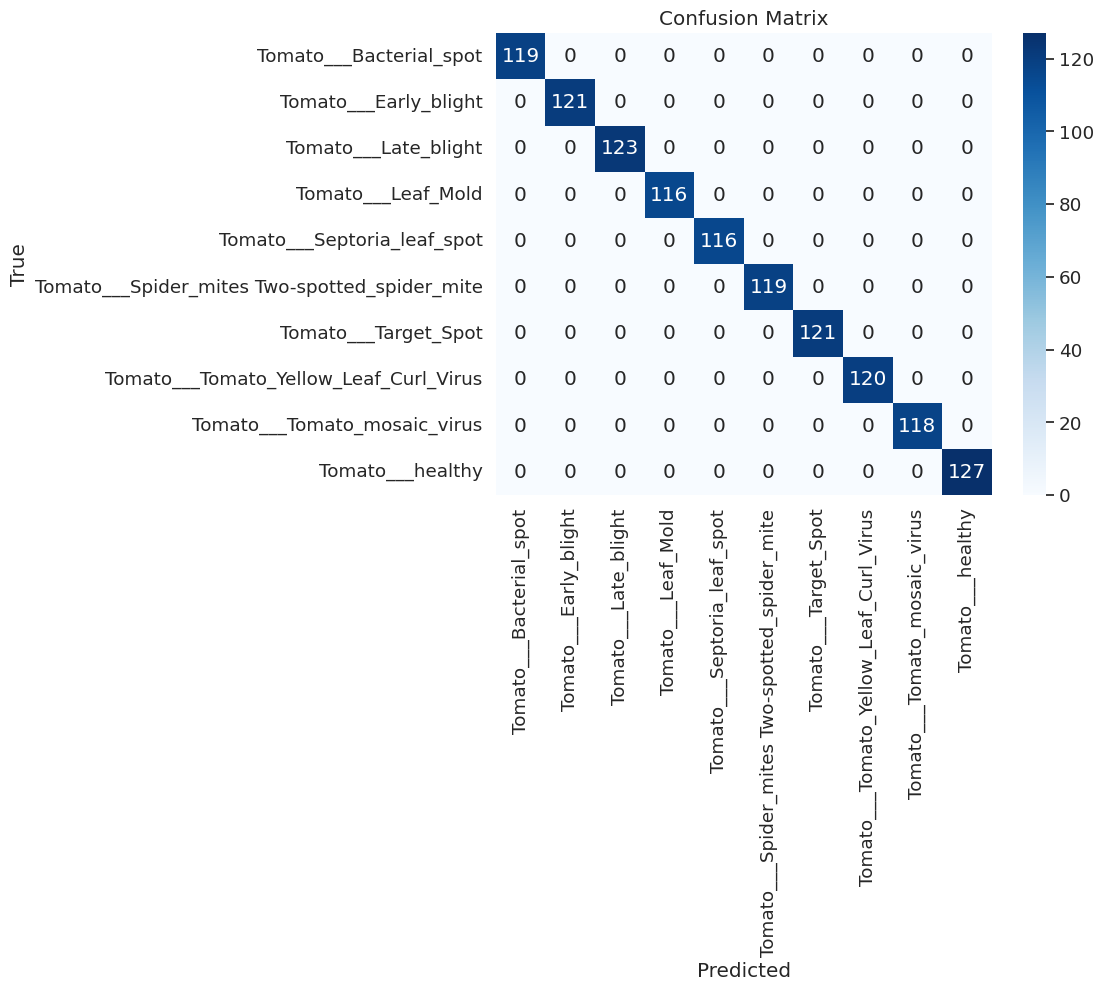

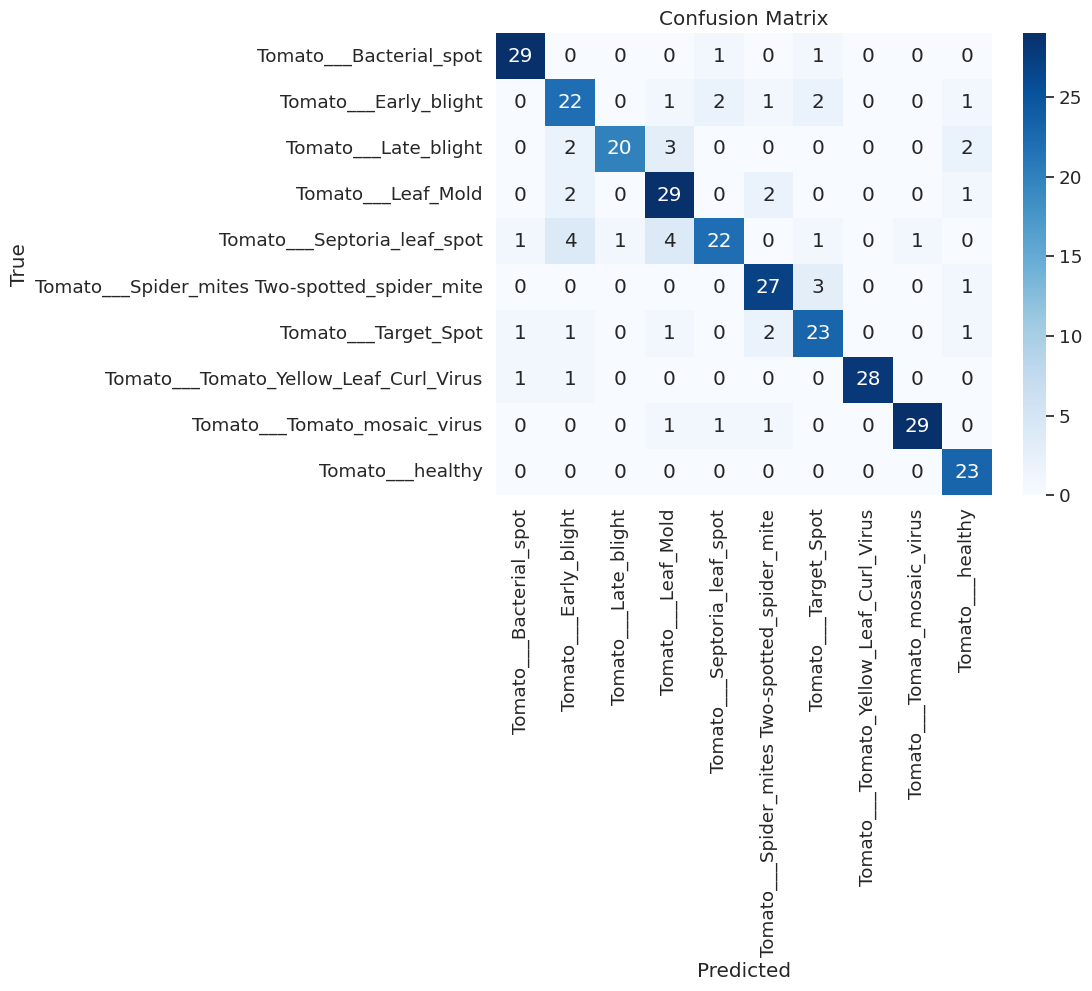

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_mobilenet.h5')

1/1 [==============================] - 0s 359ms/step
Predicted Disease: Tomato___Early_blight
Disease Scores: [[1.6486204e-01 8.3513409e-01 3.8410922e-06 9.6853574e-09 6.5710756e-13
  6.7421176e-19 4.7635610e-13 3.9948826e-09 7.5659129e-29 5.1343020e-11]]


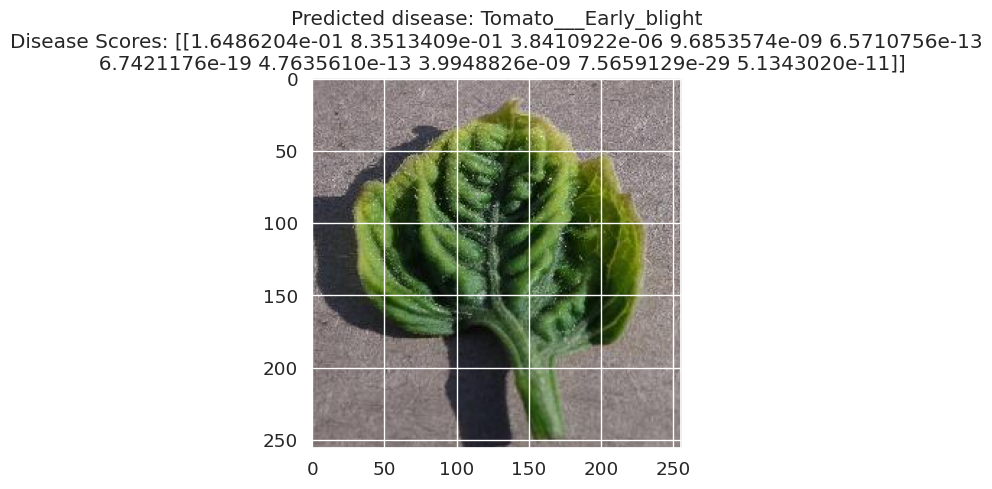

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_mobilenet.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Tomato___Bacterial_spot",
    1: "Tomato___Early_blight",
    2: "Tomato___Late_blight",
    3: "Tomato___Leaf_Mold",
    4: "Tomato___Septoria_leaf_spot",
    5: "Tomato___Spider_mites Two-spotted_spider_mite",
    6: "Tomato___Target_Spot",
    7: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    8: "Tomato___Tomato_mosaic_virus",
    9: "Tomato___healthy"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/14cfb657-506c-4691-aad2-019a2249362e___YLCV_GCREC 2007.JPG'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)

**Custom** **CNN**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing import image
from keras.losses import categorical_crossentropy

In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
cm= model2.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
38/38 [==============================] - 122s 3s/step - loss: 2.2797 - accuracy: 0.1058 - val_loss: 2.1845 - val_accuracy: 0.2200
Epoch 2/15
38/38 [==============================] - 111s 3s/step - loss: 2.0485 - accuracy: 0.2467 - val_loss: 1.9846 - val_accuracy: 0.2567
Epoch 3/15
38/38 [==============================] - 116s 3s/step - loss: 1.6213 - accuracy: 0.3975 - val_loss: 1.3532 - val_accuracy: 0.5000
Epoch 4/15
38/38 [==============================] - 121s 3s/step - loss: 1.2967 - accuracy: 0.5375 - val_loss: 1.6514 - val_accuracy: 0.4467
Epoch 5/15
38/38 [==============================] - 115s 3s/step - loss: 1.2406 - accuracy: 0.5800 - val_loss: 1.0629 - val_accuracy: 0.5933
Epoch 6/15
38/38 [==============================] - 113s 3s/step - loss: 0.9298 - accuracy: 0.6917 - val_loss: 1.2563 - val_accuracy: 0.5600
Epoch 7/15
38/38 [==============================] - 112s 3s/step - loss: 0.8335 - accuracy: 0.7092 - val_loss: 1.1582 - val_accuracy: 0.5933
Epoch 8/15
38

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

10/10 [==============================] - 5s 539ms/step - loss: 1.7437 - accuracy: 0.7400
Test accuracy: 74.00%


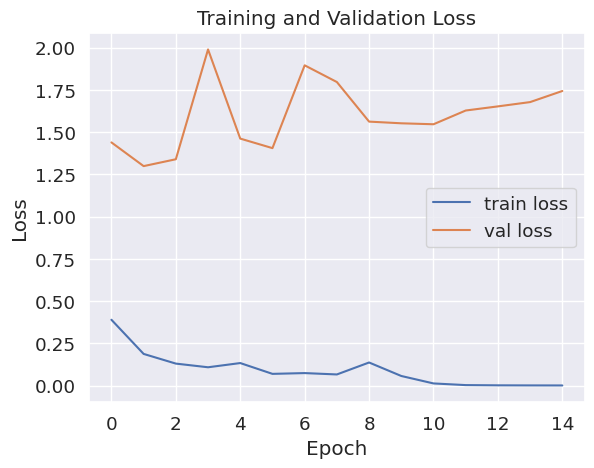

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(cm.history['loss'], label='train loss')
plt.plot(cm.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

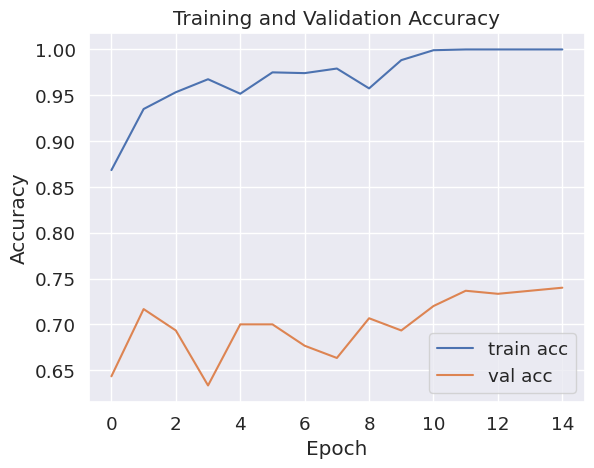

In [ ]:
# Plot the accuracy
plt.plot(cm.history['accuracy'], label='train acc')
plt.plot(cm.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model2.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model2.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

10/10 [==============================] - 5s 459ms/step
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[119   0   0   0   0   0   0   0   0   0]
 [  0 121   0   0   0   0   0   0   0   0]
 [  0   0 123   0   0   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0   0   0]
 [  0   0   0   0 116   0   0   0   0   0]
 [  0   0   0   0   0 119   0   0   0   0]
 [  0   0   0   0   0   0 121   0   0   0]
 [  0   0   0   0   0   0   0 120   0   0]
 [  0   0   0   0   0   0   0   0 118   0]
 [  0   0   0   0   0   0   0   0   0 127]]

Testing Metrics:
Accuracy: 0.7400
Precision: 0.7483
Recall: 0.7400
F1-Score: 0.7378
Confusion Matrix:
[[26  2  1  0  0  0  0  2  0  0]
 [ 2 16  5  0  1  3  1  0  1  0]
 [ 0  5 14  1  0  2  1  2  1  1]
 [ 0  0  1 29  1  0  1  0  2  0]
 [ 0  2  1  5 18  0  4  1  3  0]
 [ 0  1  0  0  0 23  5  0  2  0]
 [ 0  1  0  0  1  5 22  0  0  0]
 [ 2  3  1  0  0  1  0 23  0  0]
 [ 0  0  1  0  0  2  0  0 29  0]
 [ 0  0  0 

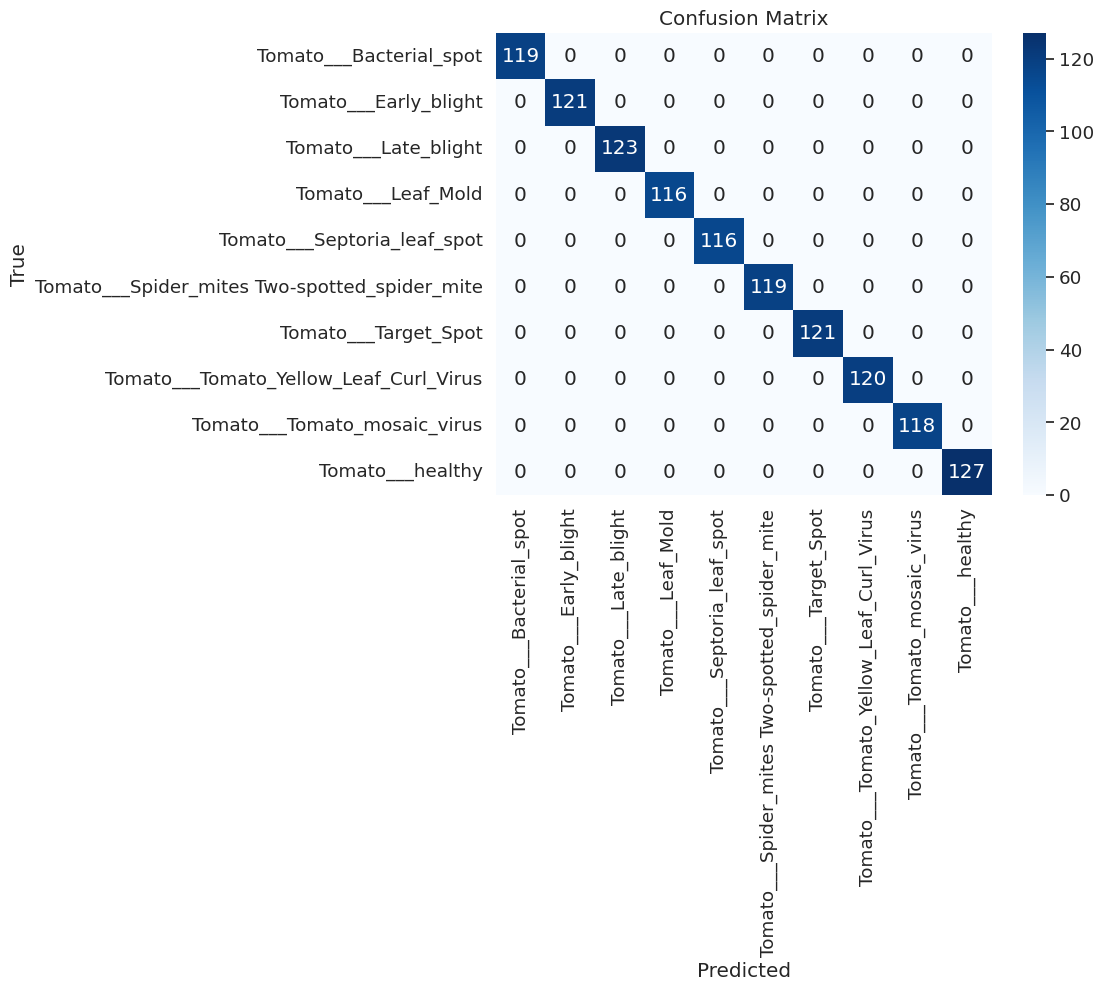

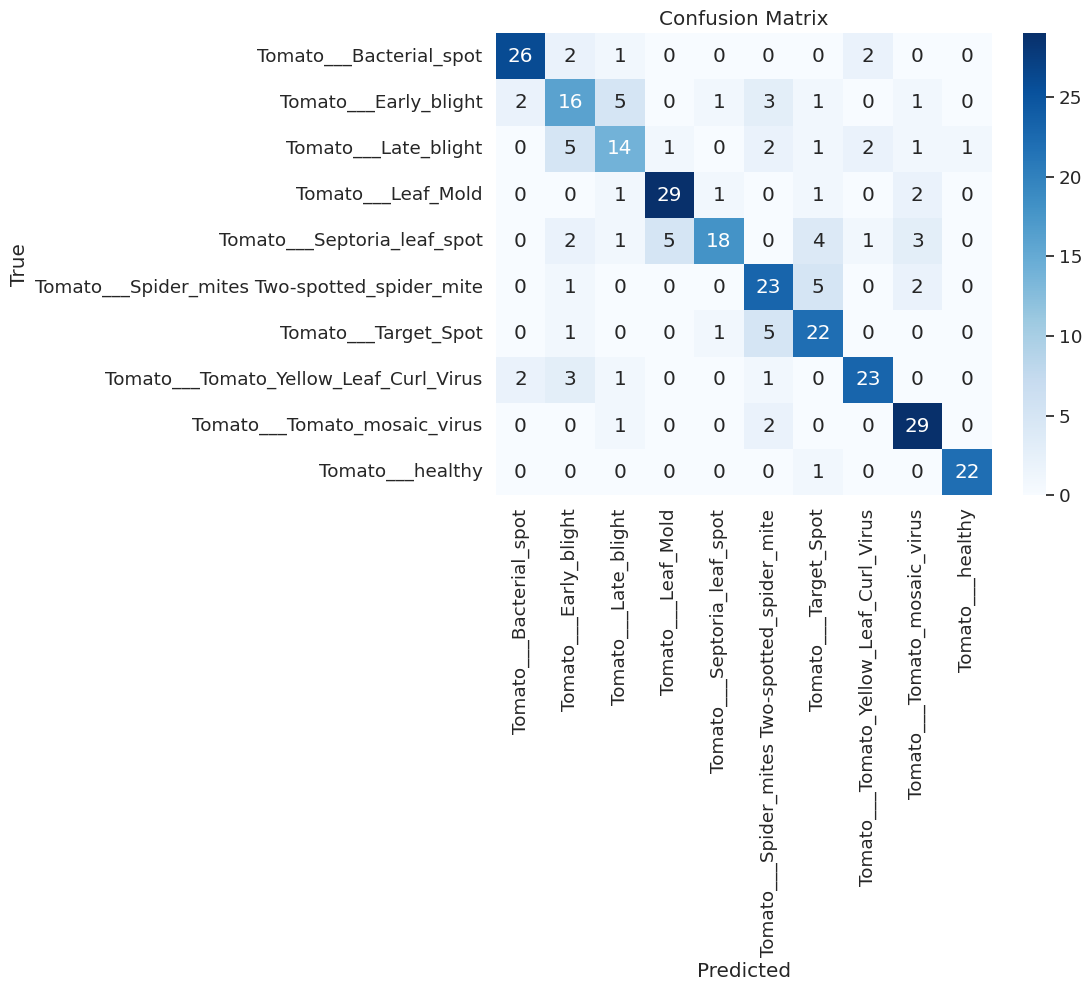

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
from tensorflow.keras.models import load_model
model2.save('model_customcnn.keras')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_customcnn.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Tomato___Bacterial_spot",
    1: "Tomato___Early_blight",
    2: "Tomato___Late_blight",
    3: "Tomato___Leaf_Mold",
    4: "Tomato___Septoria_leaf_spot",
    5: "Tomato___Spider_mites Two-spotted_spider_mite",
    6: "Tomato___Target_Spot",
    7: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    8: "Tomato___Tomato_mosaic_virus",
    9: "Tomato___healthy"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/14cfb657-506c-4691-aad2-019a2249362e___YLCV_GCREC 2007.JPG'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)

OSError: No file or directory found at /content/model_customcnn.h5

**VGG-16**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Create a VGG16 model with pre-trained weights on ImageNet
base_model3 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model3.layers:
    layer.trainable = False

# Create a custom head for classification
model3 = Sequential()
model3.add(base_model3)
model3.add(Flatten())
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Compile the model
model3.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                4

In [ ]:
vgg16= model3.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
38/38 [==============================] - 1035s 27s/step - loss: 7.7709 - accuracy: 0.2025 - val_loss: 1.6743 - val_accuracy: 0.4433
Epoch 2/15
38/38 [==============================] - 1018s 27s/step - loss: 1.4478 - accuracy: 0.5092 - val_loss: 1.1938 - val_accuracy: 0.5933
Epoch 3/15
38/38 [==============================] - 1014s 27s/step - loss: 1.2095 - accuracy: 0.5542 - val_loss: 0.9446 - val_accuracy: 0.7100
Epoch 4/15
38/38 [==============================] - 1009s 27s/step - loss: 1.1419 - accuracy: 0.5850 - val_loss: 0.9013 - val_accuracy: 0.7167
Epoch 5/15
38/38 [==============================] - 1007s 27s/step - loss: 1.0460 - accuracy: 0.6208 - val_loss: 0.9781 - val_accuracy: 0.6833
Epoch 6/15
38/38 [==============================] - 1007s 27s/step - loss: 1.0484 - accuracy: 0.6233 - val_loss: 0.8869 - val_accuracy: 0.7100
Epoch 7/15
38/38 [==============================] - 1006s 27s/step - loss: 0.9609 - accuracy: 0.6508 - val_loss: 0.9638 - val_accuracy: 0.6867

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model3.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model3.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

10/10 [==============================] - 183s 18s/step
Training Metrics:
Accuracy: 0.9850
Precision: 0.9853
Recall: 0.9850
F1-Score: 0.9850
Confusion Matrix:
[[119   0   0   0   0   0   0   0   0   0]
 [  0 119   0   0   0   2   0   0   0   0]
 [  0   3 116   4   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   1   0]
 [  0   0   0   0 114   0   2   0   0   0]
 [  0   0   0   0   0 117   1   0   1   0]
 [  0   2   0   1   0   0 117   0   0   1]
 [  0   0   0   0   0   0   0 120   0   0]
 [  0   0   0   0   0   0   0   0 118   0]
 [  0   0   0   0   0   0   0   0   0 127]]

Testing Metrics:
Accuracy: 0.7667
Precision: 0.7827
Recall: 0.7667
F1-Score: 0.7647
Confusion Matrix:
[[28  1  0  0  2  0  0  0  0  0]
 [ 1 18  0  4  1  2  2  0  1  0]
 [ 1  8 15  2  0  1  0  0  0  0]
 [ 0  1  0 29  0  1  0  0  3  0]
 [ 1  3  1  4 18  0  3  0  4  0]
 [ 0  1  0  0  0 28  2  0  0  0]
 [ 1  3  0  0  1  5 18  0  0  1]
 [ 1  1  1  0  0  1  0 26  0  0]
 [ 0  0  0  0  1  2  0  0 29  0]
 [ 0  0  0 

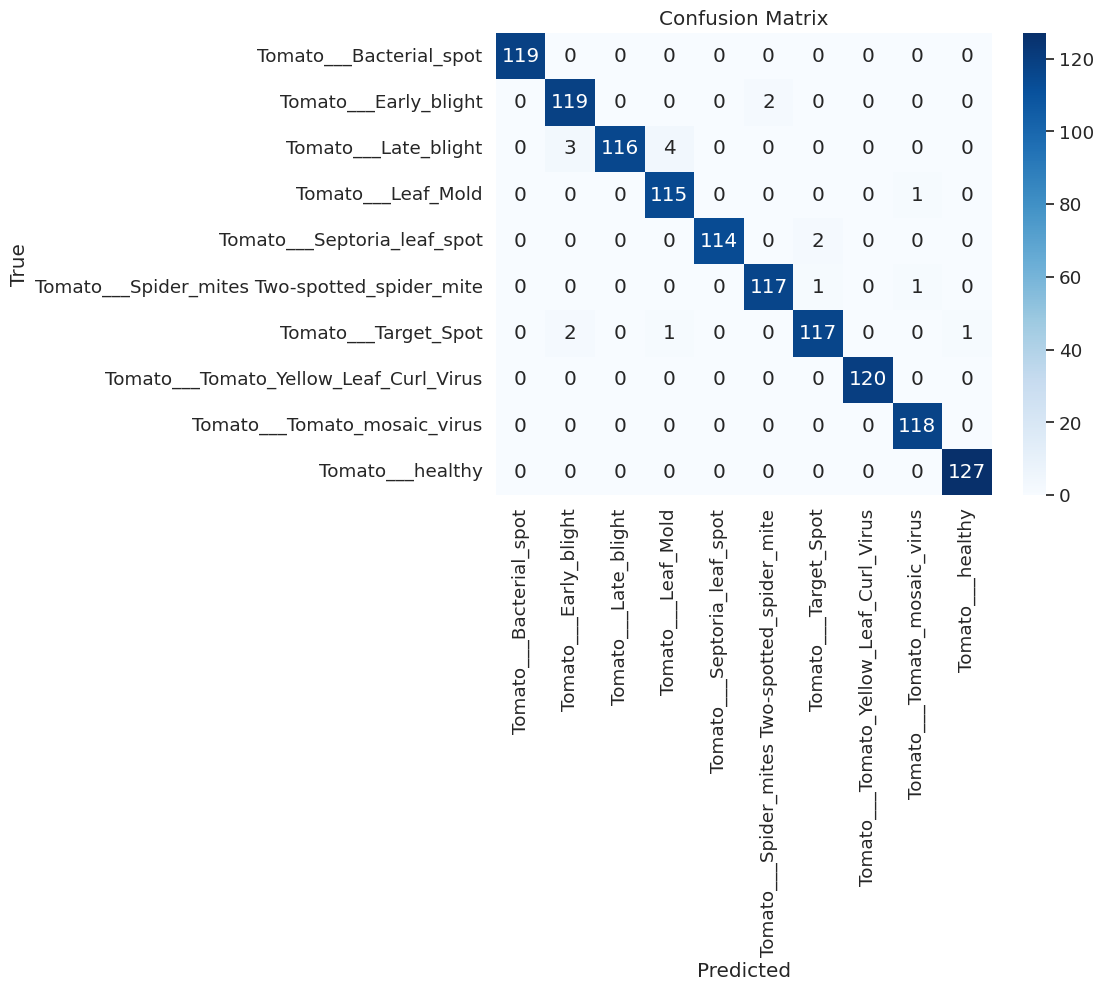

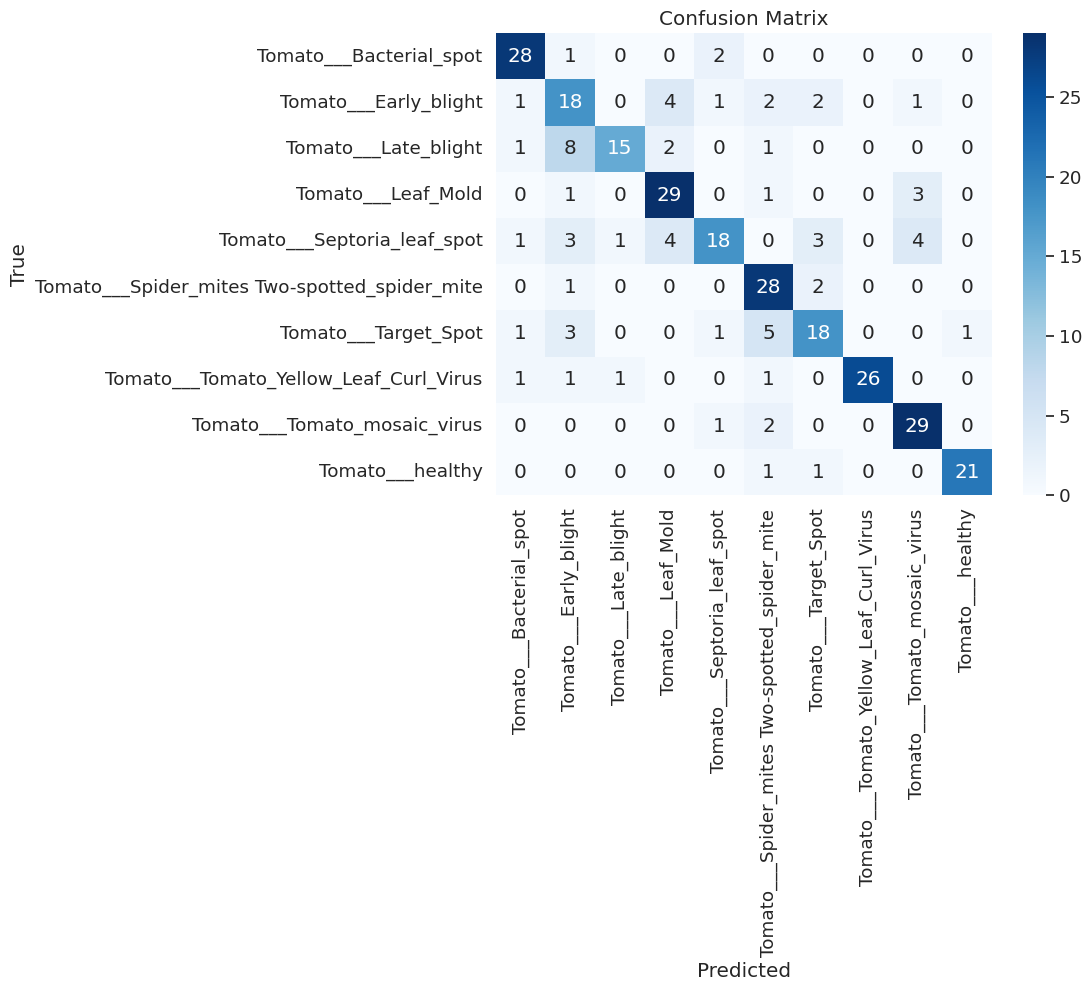

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

10/10 [==============================] - 182s 18s/step - loss: 0.7486 - accuracy: 0.7667
Test accuracy: 76.67%


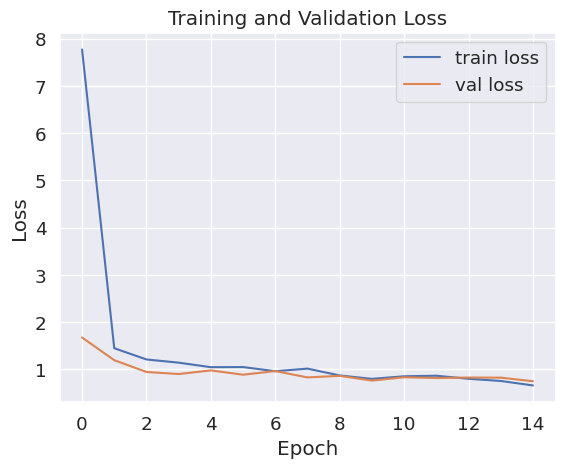

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(vgg16.history['loss'], label='train loss')
plt.plot(vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

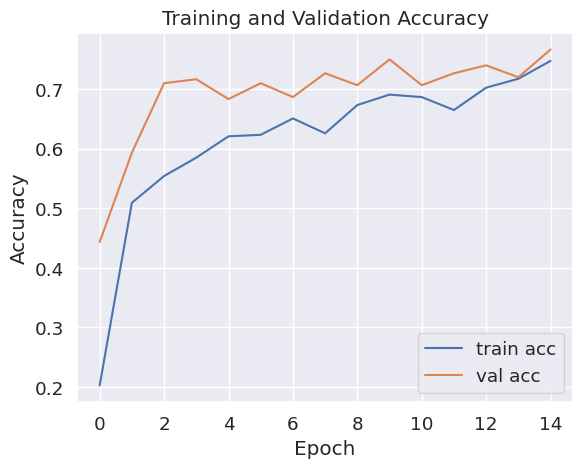

In [ ]:
# Plot the accuracy
plt.plot(vgg16.history['accuracy'], label='train acc')
plt.plot(vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model3.save('model_vgg16.h5')

1/1 [==============================] - 1s 777ms/step
Predicted Disease: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Disease Scores: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


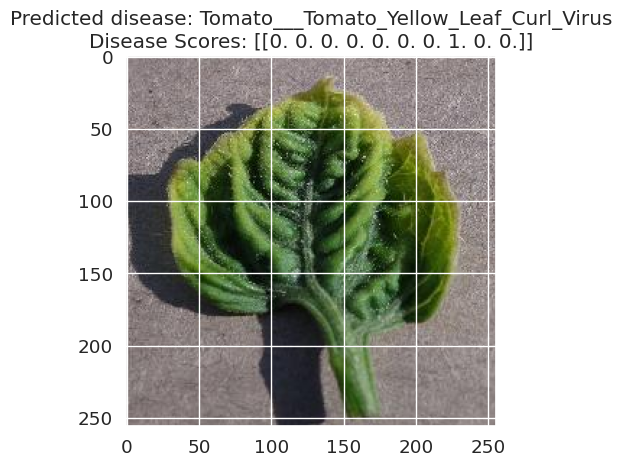

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_vgg16.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Tomato___Bacterial_spot",
    1: "Tomato___Early_blight",
    2: "Tomato___Late_blight",
    3: "Tomato___Leaf_Mold",
    4: "Tomato___Septoria_leaf_spot",
    5: "Tomato___Spider_mites Two-spotted_spider_mite",
    6: "Tomato___Target_Spot",
    7: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    8: "Tomato___Tomato_mosaic_virus",
    9: "Tomato___healthy"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/14cfb657-506c-4691-aad2-019a2249362e___YLCV_GCREC 2007.JPG'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)

**VGG-19**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
base_model4 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers of the base VGG19 model
for layer in base_model4.layers:
    layer.trainable = False

# Create your custom top layers for classification
x = layers.Flatten()(base_model4.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax')(x)

# Create the new model with the VGG19 base and custom top
model4 = models.Model(inputs=base_model4.input, outputs=output)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model4.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg19 = model4.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
38/38 [==============================] - 994s 26s/step - loss: 2.8072 - accuracy: 0.1608 - val_loss: 1.9523 - val_accuracy: 0.3333
Epoch 2/15
38/38 [==============================] - 988s 26s/step - loss: 1.9351 - accuracy: 0.2858 - val_loss: 1.8024 - val_accuracy: 0.5067
Epoch 3/15
38/38 [==============================] - 979s 26s/step - loss: 1.7928 - accuracy: 0.3408 - val_loss: 1.5498 - val_accuracy: 0.5733
Epoch 4/15
38/38 [==============================] - 985s 26s/step - loss: 1.5940 - accuracy: 0.4117 - val_loss: 1.3461 - val_accuracy: 0.5967
Epoch 5/15
38/38 [==============================] - 984s 26s/step - loss: 1.4456 - accuracy: 0.4575 - val_loss: 1.2677 - val_accuracy: 0.6367
Epoch 6/15
38/38 [==============================] - 987s 26s/step - loss: 1.2850 - accuracy: 0.5225 - val_loss: 1.1928 - val_accuracy: 0.6500
Epoch 7/15
38/38 [==============================] - 987s 26s/step - loss: 1.2904 - accuracy: 0.5033 - val_loss: 1.1042 - val_accuracy: 0.6900
Epoch 

In [ ]:
 #Evaluate the model on your test data.
test_loss, test_accuracy = model4.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

10/10 [==============================] - 211s 20s/step - loss: 0.8952 - accuracy: 0.7167
Test accuracy: 71.67%


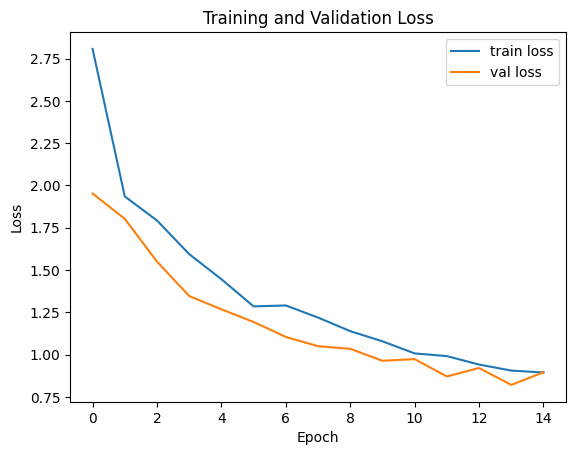

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(vgg19.history['loss'], label='train loss')
plt.plot(vgg19.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

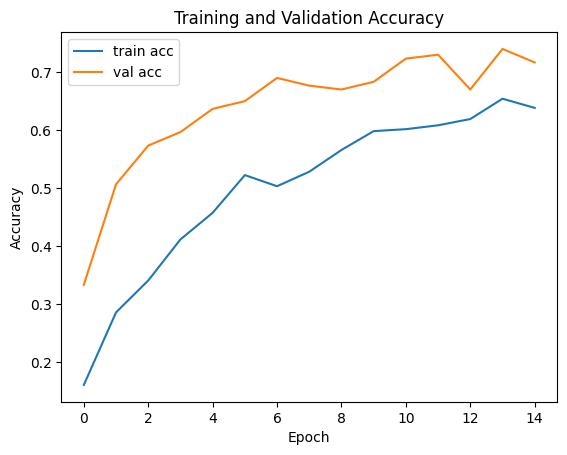

In [ ]:
# Plot the accuracy
plt.plot(vgg19.history['accuracy'], label='train acc')
plt.plot(vgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model4.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model4.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

10/10 [==============================] - 199s 20s/step
Training Metrics:
Accuracy: 0.9867
Precision: 0.9870
Recall: 0.9867
F1-Score: 0.9866
Confusion Matrix:
[[119   0   0   0   0   0   0   0   0   0]
 [  0 119   0   0   1   0   0   0   0   1]
 [  2   0 121   0   0   0   0   0   0   0]
 [  0   2   0 114   0   0   0   0   0   0]
 [  2   0   0   0 114   0   0   0   0   0]
 [  0   0   0   0   0 119   0   0   0   0]
 [  0   0   0   0   1   4 113   0   0   3]
 [  0   0   0   0   0   0   0 120   0   0]
 [  0   0   0   0   0   0   0   0 118   0]
 [  0   0   0   0   0   0   0   0   0 127]]

Testing Metrics:
Accuracy: 0.7167
Precision: 0.7282
Recall: 0.7167
F1-Score: 0.7105
Confusion Matrix:
[[28  3  0  0  0  0  0  0  0  0]
 [ 3 14  1  8  1  0  1  0  1  0]
 [ 0  6 15  4  1  0  1  0  0  0]
 [ 0  1  2 26  2  1  0  0  2  0]
 [ 2  3  1  5 21  0  0  0  2  0]
 [ 0  1  0  0  1 23  0  1  1  4]
 [ 0  2  0  0  3  6 11  0  1  6]
 [ 0  1  1  1  0  0  0 27  0  0]
 [ 0  0  0  1  2  1  0  0 28  0]
 [ 0  0  0 

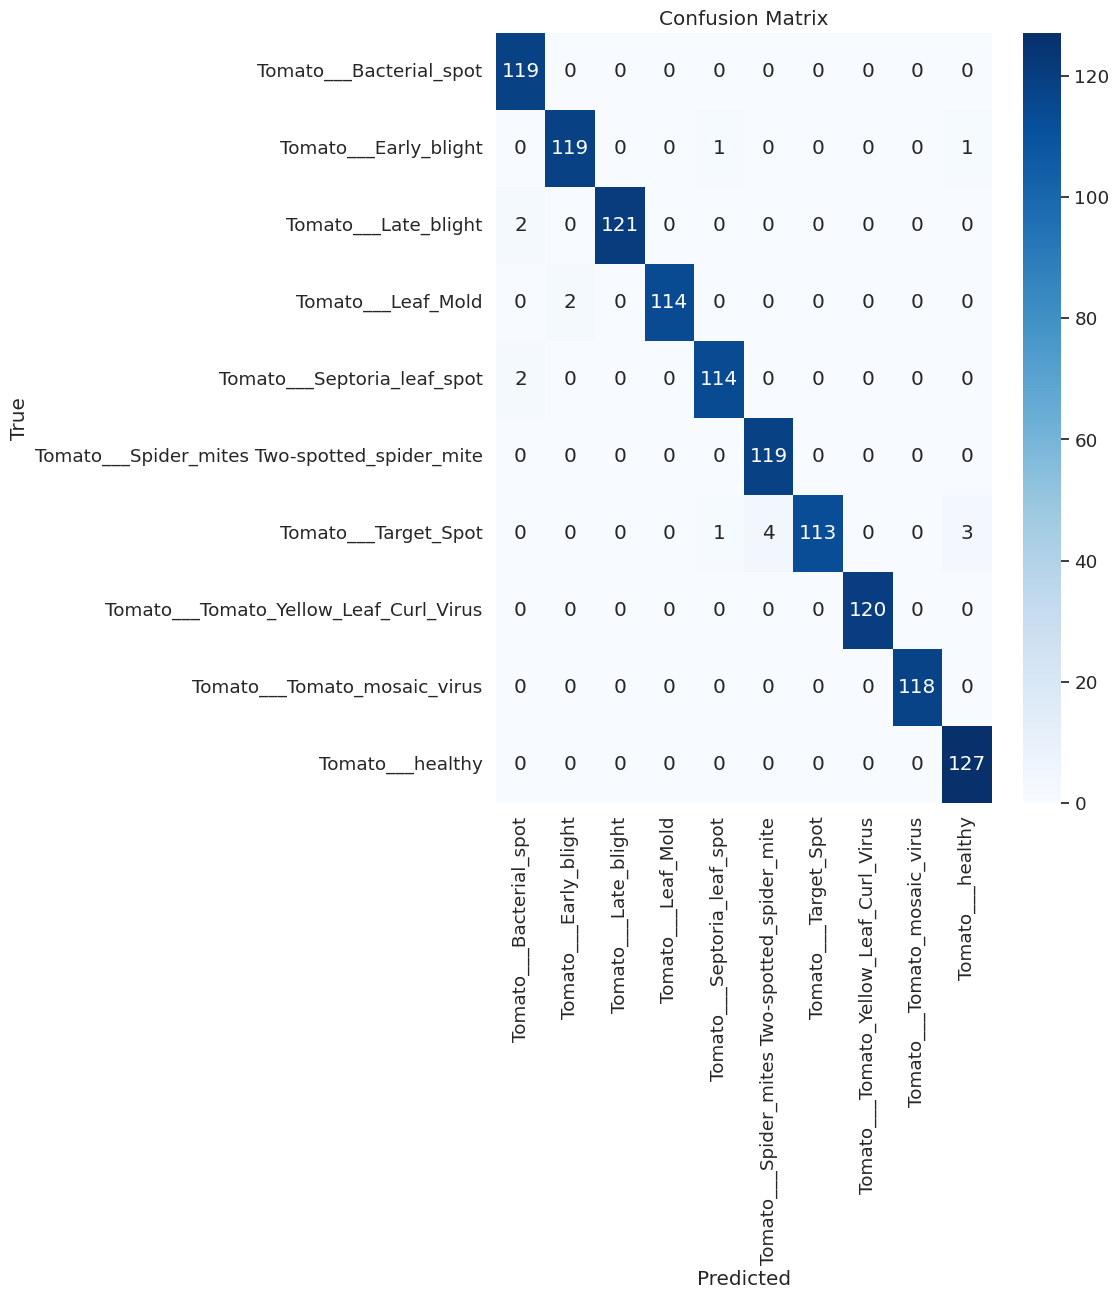

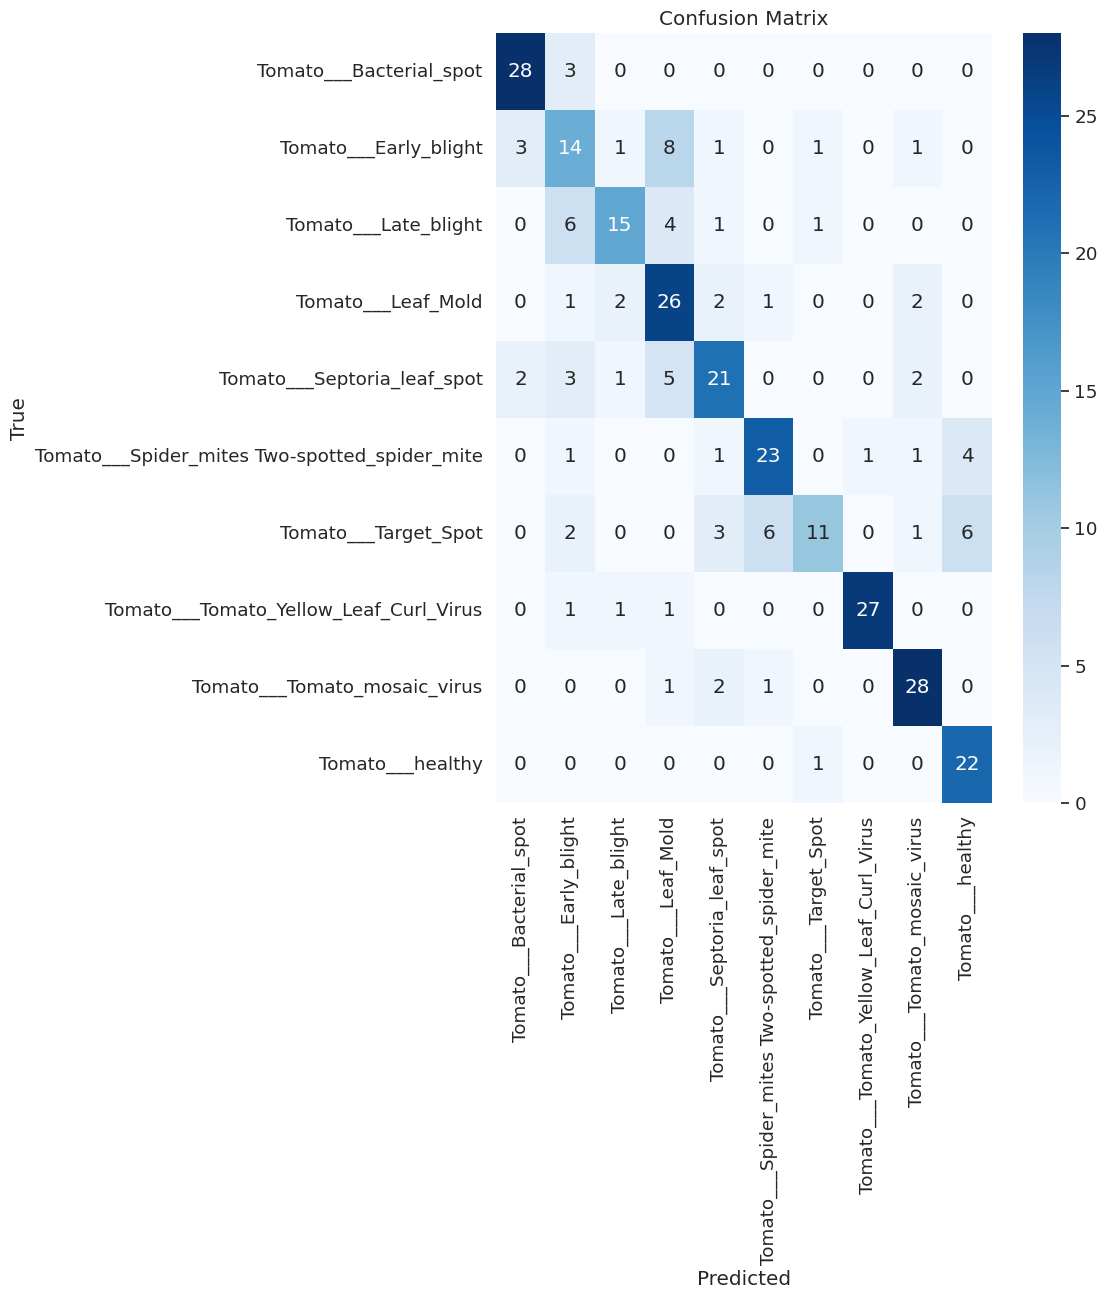

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 10))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
from tensorflow.keras.models import load_model
model4.save('model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step
Predicted Disease: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Disease Scores: [[0.000000e+00 0.000000e+00 0.000000e+00 9.252212e-12 0.000000e+00
  0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00]]


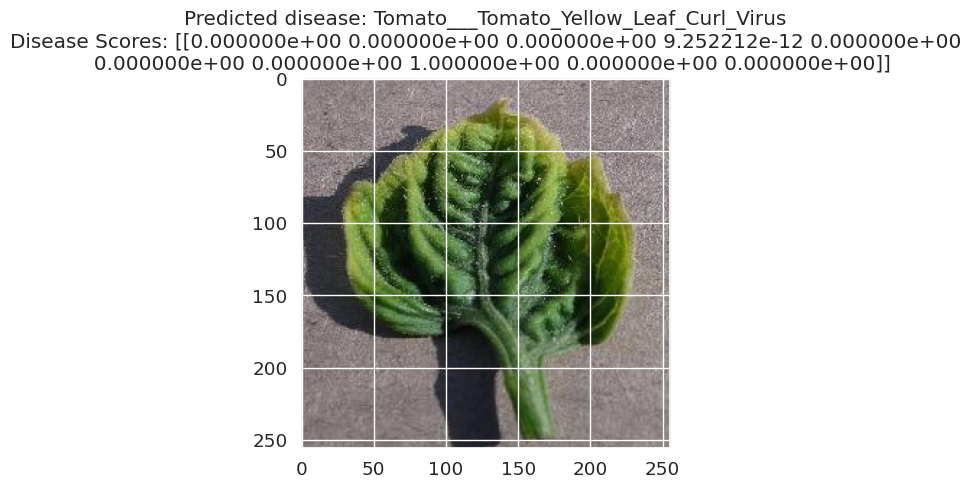

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_vgg19.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Tomato___Bacterial_spot",
    1: "Tomato___Early_blight",
    2: "Tomato___Late_blight",
    3: "Tomato___Leaf_Mold",
    4: "Tomato___Septoria_leaf_spot",
    5: "Tomato___Spider_mites Two-spotted_spider_mite",
    6: "Tomato___Target_Spot",
    7: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    8: "Tomato___Tomato_mosaic_virus",
    9: "Tomato___healthy"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/14cfb657-506c-4691-aad2-019a2249362e___YLCV_GCREC 2007.JPG'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)